# 결측치

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("👽 Hello.")

👽 Hello.


In [3]:
import os

csv_file_path = 'data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지  기타사항
0  2015년 01월  중국  116932.0  12083947.0  334522.0  8143271.0  3940676.0   NaN
1  2015년 01월  미국   65888.0   5561545.0  509564.0  3625062.0  1936484.0   NaN
2  2015년 01월  일본   54017.0   2251307.0   82480.0  3827247.0 -1575940.0   NaN
3  2015년 02월  중국   86228.0   9927642.0  209100.0  6980874.0  2946768.0   NaN
4  2015년 02월  미국   60225.0   5021264.0  428678.0  2998216.0  2023048.0   NaN

In [4]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [5]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [6]:
trade = trade.drop('기타사항', axis=1)
trade.head()

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
0  2015년 01월  중국  116932.0  12083947.0  334522.0  8143271.0  3940676.0
1  2015년 01월  미국   65888.0   5561545.0  509564.0  3625062.0  1936484.0
2  2015년 01월  일본   54017.0   2251307.0   82480.0  3827247.0 -1575940.0
3  2015년 02월  중국   86228.0   9927642.0  209100.0  6980874.0  2946768.0
4  2015년 02월  미국   60225.0   5021264.0  428678.0  2998216.0  2023048.0

In [7]:
trade.isnull()

기간    국가명   수출건수   수출금액   수입건수   수입금액   무역수지
0    False  False  False  False  False  False  False
1    False  False  False  False  False  False  False
2    False  False  False  False  False  False  False
3    False  False  False  False  False  False  False
4    False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...
194  False  False  False  False  False  False  False
195  False  False  False  False  False  False  False
196  False  False   True   True   True   True   True
197  False  False   True   True   True   True   True
198  False  False   True   True   True   True   True

[199 rows x 7 columns]

In [8]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [9]:
trade[trade.isnull().any(axis=1)]

기간 국가명      수출건수  수출금액       수입건수       수입금액  무역수지
191  2020년 04월  미국  105360.0   NaN  1141118.0  5038739.0   NaN
196  2020년 06월  중국       NaN   NaN        NaN        NaN   NaN
197  2020년 06월  미국       NaN   NaN        NaN        NaN   NaN
198  2020년 06월  일본       NaN   NaN        NaN        NaN   NaN

In [10]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [11]:
trade[trade.isnull().any(axis=1)]

기간 국가명      수출건수  수출금액       수입건수       수입금액  무역수지
191  2020년 04월  미국  105360.0   NaN  1141118.0  5038739.0   NaN

In [12]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]

기간 국가명      수출건수       수출금액       수입건수       수입금액  무역수지
191  2020년 04월  미국  105360.0  5946782.0  1141118.0  5038739.0   NaN

In [13]:
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'] 
trade.loc[[191]]

기간 국가명      수출건수       수출금액       수입건수       수입금액      무역수지
191  2020년 04월  미국  105360.0  5946782.0  1141118.0  5038739.0  908043.0

# 중복된 데이터

In [14]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [15]:
trade[trade.duplicated()]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
187  2020년 03월  중국  248059.0  10658599.0  358234.0  8948918.0  1709682.0

In [16]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
186  2020년 03월  중국  248059.0  10658599.0  358234.0  8948918.0  1709682.0
187  2020년 03월  중국  248059.0  10658599.0  358234.0  8948918.0  1709682.0

In [17]:
trade.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [18]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
186  2020년 03월  중국  248059.0  10658599.0  358234.0  8948918.0  1709682.0

In [19]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

id      name
0  001  Park Yun
1  002  Kim Sung
2  003  Park Jin
3  004   Lee Han
4  002   Kim Min

In [20]:
df.drop_duplicates(subset=['id'], keep='last')

id      name
0  001  Park Yun
2  003  Park Jin
3  004   Lee Han
4  002   Kim Min

# 이상치(Outlier)

In [21]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [22]:
trade.loc[outlier(trade, '무역수지', 1.5)]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
6    2015년 03월  중국  117529.0  11868032.0  234321.0  7226911.0  4641121.0
75   2017년 02월  중국  159062.0  11118131.0  188555.0  6600637.0  4517495.0
80   2017년 03월  일본   65093.0   2395932.0  165734.0  5157589.0 -2761657.0
96   2017년 09월  중국  183442.0  13540683.0  295443.0  8443414.0  5097269.0
99   2017년 10월  중국  137873.0  12580474.0  244977.0  7932403.0  4648071.0
101  2017년 10월  일본   63510.0   1847999.0  127696.0  4418583.0 -2570584.0
102  2017년 11월  중국  421194.0  14000887.0  307790.0  9253318.0  4747569.0
105  2017년 12월  중국  218114.0  13848364.0  290347.0  8600132.0  5248232.0
114  2018년 03월  중국  232396.0  13576667.0  267249.0  8412516.0  5164151.0
116  2018년 03월  일본   80142.0   2603450.0  159601.0  5226141.0 -2622691.0
120  2018년 05월  중국  214145.0  13851900.0  307183.0  9279720.0  4572180.0
123  2018년 06월  중국  257130.0  13814241.0  279023.0  8713018.0  5101223.0
126  2018년 07월  중국  181772.0  13721233.0  293164.0  8869278.0  4851955.0
129  2018년 08월  중국  199010.0  14401521.0  280033.0  8525532.0  5875989.0
132  2018년 09월  중국  171328.0  14590529.0  280337.0  7889890.0  6700639.0
135  2018년 10월  중국  169809.0  14767041.0  319876.0  9963108.0  4803932.0

In [23]:
trade.loc[outlier(trade, '무역수지', 2)]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
129  2018년 08월  중국  199010.0  14401521.0  280033.0  8525532.0  5875989.0
132  2018년 09월  중국  171328.0  14590529.0  280337.0  7889890.0  6700639.0

In [24]:
trade.loc[outlier(trade, '무역수지', 3)]

Empty DataFrame
Columns: [기간, 국가명, 수출건수, 수출금액, 수입건수, 수입금액, 무역수지]
Index: []

In [25]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [26]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

기간 국가명      수출건수        수출금액       수입건수       수입금액       무역수지
0    2015년 01월  중국  116932.0  12083947.0   334522.0  8143271.0  3940676.0
1    2015년 01월  미국   65888.0   5561545.0   509564.0  3625062.0  1936484.0
2    2015년 01월  일본   54017.0   2251307.0    82480.0  3827247.0 -1575940.0
3    2015년 02월  중국   86228.0   9927642.0   209100.0  6980874.0  2946768.0
4    2015년 02월  미국   60225.0   5021264.0   428678.0  2998216.0  2023048.0
..         ...  ..       ...         ...        ...        ...        ...
191  2020년 04월  미국  105360.0   5946782.0  1141118.0  5038739.0   908043.0
192  2020년 04월  일본  134118.0   1989323.0   141207.0  3989562.0 -2000239.0
193  2020년 05월  중국  185320.0  10746069.0   349007.0  8989920.0  1756149.0
194  2020년 05월  미국  126598.0   4600726.0  1157163.0  4286873.0   313853.0
195  2020년 05월  일본  166568.0   1798128.0   133763.0  3102734.0 -1304606.0

[179 rows x 7 columns]

In [27]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

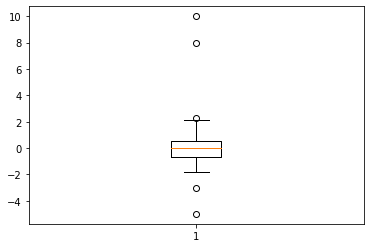

In [28]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [29]:
Q3, Q1 = np.percentile(data, [75 ,25])
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)

-0.6478448291078243 0.5166477538712722
1.1644925829790964


In [30]:
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [31]:
def outlier2(df, col):
    Q3, Q1 = np.percentile(df[col], [75 ,25])
    IQR = Q3 - Q1
    print(Q3, Q1 , IQR)
    down = Q1-(1.5*IQR)
    up = Q3+(1.5*IQR)
    print(down, up)
    return df[(down > df[col])|(up < df[col])]

outlier2(trade, '무역수지')

2745131.0 -1620432.0 4365563.0
-8168776.5 9293475.5


Empty DataFrame
Columns: [기간, 국가명, 수출건수, 수출금액, 수입건수, 수입금액, 무역수지]
Index: []

In [32]:
pd.set_option('display.max_row', 500)
print(np.min(trade['무역수지']))
print(np.max(trade['무역수지']))

-2761657.0
6700639.0


# 정규화

In [33]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
np.random.seed(2020)
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

A         B
0   -3.075383 -0.448552
1    4.302209 -2.151012
2   -0.522519 -1.245304
3    1.394279 -1.169169
4    0.427537 -0.458080
5   -1.096404 -1.217963
6    3.755382 -1.275426
7    4.258055 -0.872180
8    5.640452 -3.493286
9    1.708470 -1.119114
10   0.794666  0.660023
11   9.248141 -0.558734
12   9.098795 -1.500998
13  -0.857430 -0.914547
14   5.254878 -0.421144
15  -1.779286 -2.061335
16   2.524155 -2.018343
17   0.923094  0.159324
18   5.570464 -0.343499
19   4.229175 -1.491061
20  12.359915 -0.840562
21   4.167885 -1.258766
22   3.806637 -1.420518
23   1.947384  0.750089
24   3.661643 -0.870803
25  -0.861800 -1.337695
26  -1.651723  0.238682
27  -1.947642 -0.778894
28   5.528899 -2.113084
29   7.750692 -1.606372
30  11.090712 -0.729457
31   7.515312 -0.993515
32   5.326876  1.520968
33   2.775857 -1.024353
34   8.961065 -1.260059
35   3.137493 -1.947716
36   4.623718 -1.902135
37   4.392222  1.303569
38   7.328383 -1.383852
39  12.180822 -1.256526
40   2.732744 -2.103038
41  -1.251332 -0.663646
42  -3.017830 -2.232590
43   4.408376 -0.002032
44  -1.446008 -1.259300
45   5.927140 -1.572586
46   3.166685 -1.391698
47   3.632546 -2.504356
48   6.810753 -1.763433
49   4.414620 -1.532817
50   6.484946 -0.438032
51   7.816460 -1.185036
52  12.151254 -2.432715
53   2.062195 -0.543340
54   4.828620 -0.067258
55  10.576969  0.016796
56   2.047170 -0.512137
57   3.928687 -1.797330
58   5.875662 -1.440643
59   5.119491  1.112721
60   1.413401 -1.715594
61   1.823760  0.700281
62   3.359641 -1.688004
63   4.151247 -1.862387
64   8.135332  1.199072
65  -0.923845 -1.722561
66  -0.986947 -0.749242
67   5.182882 -0.699988
68  12.563850 -0.818729
69   0.319191  0.071563
70   3.759990 -2.857790
71   5.119136 -0.546412
72  -2.125079 -1.155481
73   2.788276 -2.528801
74   3.415943 -1.250483
75   5.109846 -0.771579
76   3.441917  1.467447
77   6.780639 -0.365876
78   3.546450 -1.419136
79  -0.933068  0.014883
80   0.815435 -2.826016
81   2.130434 -1.360642
82   6.635624 -2.085569
83   2.357475 -0.964635
84   4.693774 -0.682118
85   5.157847 -2.332431
86   8.138069 -1.192945
87   8.906468 -1.439338
88  10.879930 -0.471279
89   5.632273 -0.695108
90   5.290276 -0.443650
91   8.188910  0.018385
92  -3.278401  1.095814
93   2.296714  0.039717
94   4.498195 -1.466278
95  13.250265 -0.734271
96   0.137697 -2.041710
97   2.614901 -3.057545
98   7.866735 -2.140529
99   0.297992 -0.503868

In [34]:
temp = [x - x.mean()],[x.std()]
temp

([           A         B
  0  -7.101537  0.562915
  1   0.276055 -1.139545
  2  -4.548673 -0.233837
  3  -2.631875 -0.157702
  4  -3.598617  0.553387
  5  -5.122558 -0.206496
  6  -0.270772 -0.263959
  7   0.231901  0.139287
  8   1.614298 -2.481819
  9  -2.317684 -0.107647
  10 -3.231489  1.671490
  11  5.221987  0.452733
  12  5.072641 -0.489531
  13 -4.883585  0.096920
  14  1.228724  0.590323
  15 -5.805440 -1.049868
  16 -1.501999 -1.006876
  17 -3.103060  1.170791
  18  1.544310  0.667968
  19  0.203021 -0.479594
  20  8.333761  0.170905
  21  0.141731 -0.247299
  22 -0.219517 -0.409051
  23 -2.078770  1.761556
  24 -0.364511  0.140664
  25 -4.887954 -0.326228
  26 -5.677877  1.250149
  27 -5.973796  0.232573
  28  1.502745 -1.101617
  29  3.724538 -0.594905
  30  7.064558  0.282010
  31  3.489158  0.017952
  32  1.300722  2.532435
  33 -1.250297 -0.012886
  34  4.934911 -0.248592
  35 -0.888661 -0.936249
  36  0.597564 -0.890668
  37  0.366068  2.315036
  38  3.302229 -0.372385


In [35]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization

A         B
0  -1.862058  0.559307
1   0.072383 -1.132240
2  -1.192684 -0.232338
3  -0.690090 -0.156691
4  -0.943575  0.549839
5  -1.343160 -0.205172
6  -0.070998 -0.262267
7   0.060806  0.138394
8   0.423277 -2.465910
9  -0.607708 -0.106957
10 -0.847312  1.660776
11  1.369230  0.449831
12  1.330071 -0.486393
13 -1.280500  0.096299
14  0.322177  0.586539
15 -1.522215 -1.043138
16 -0.393832 -1.000421
17 -0.813638  1.163285
18  0.404926  0.663686
19  0.053233 -0.476520
20  2.185153  0.169810
21  0.037163 -0.245714
22 -0.057558 -0.406429
23 -0.545064  1.750264
24 -0.095577  0.139762
25 -1.281646 -0.324136
26 -1.488767  1.242136
27 -1.566359  0.231082
28  0.394027 -1.094555
29  0.976592 -0.591091
30  1.852362  0.280202
31  0.914874  0.017837
32  0.341056  2.516201
33 -0.327834 -0.012804
34  1.293958 -0.246998
35 -0.233011 -0.930247
36  0.156684 -0.884958
37  0.095985  2.300196
38  0.865861 -0.369998
39  2.138194 -0.243488
40 -0.339138 -1.084573
41 -1.383783  0.345591
42 -1.846967 -1.213295
43  0.100221  1.002964
44 -1.434828 -0.246244
45  0.498448 -0.557522
46 -0.225357 -0.377793
47 -0.103206 -1.483319
48  0.730135 -0.747146
49  0.101858 -0.518008
50  0.644707  0.569759
51  0.993837 -0.172456
52  2.130441 -1.412137
53 -0.514960  0.465126
54  0.210410  0.938156
55  1.717656  1.021671
56 -0.518899  0.496129
57 -0.025556 -0.780825
58  0.484950 -0.426425
59  0.286678  2.110571
60 -0.685077 -0.699614
61 -0.577479  1.700775
62 -0.174763 -0.672200
63  0.032800 -0.845465
64  1.077447  2.196369
65 -1.297914 -0.706536
66 -1.314460  0.260544
67  0.303300  0.309482
68  2.238626  0.191502
69 -0.971984  1.076087
70 -0.069789 -1.834487
71  0.286585  0.462074
72 -1.612883 -0.143091
73 -0.324578 -1.507607
74 -0.160000 -0.237484
75  0.284149  0.238350
76 -0.153190  2.463023
77  0.722239  0.641452
78 -0.125781 -0.405056
79 -1.300332  1.019771
80 -0.841866 -1.802917
81 -0.497067 -0.346937
82  0.684216 -1.067217
83 -0.437536  0.046532
84  0.175053  0.327238
85  0.296735 -1.312496
86  1.078164 -0.180314
87  1.279642 -0.425128
88  1.797094  0.536725
89  0.421132  0.314331
90  0.331459  0.564177
91  1.091495  1.023250
92 -1.915290  2.093772
93 -0.453468  1.044446
94  0.123772 -0.451896
95  2.418607  0.275419
96 -1.019573 -1.023639
97 -0.370038 -2.032961
98  1.007019 -1.121824
99 -0.977542  0.504345

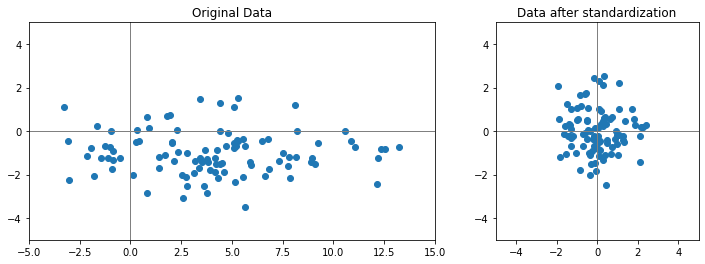

In [36]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

In [37]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

A         B
0   0.012283  0.607216
1   0.458634  0.267692
2   0.166733  0.448318
3   0.282702  0.463502
4   0.224213  0.605316
5   0.132013  0.453771
6   0.425551  0.442311
7   0.455963  0.522731
8   0.539599  0.000000
9   0.301710  0.473485
10  0.246424  0.828301
11  0.757868  0.585242
12  0.748832  0.397325
13  0.146471  0.514282
14  0.516271  0.612682
15  0.090698  0.285576
16  0.351060  0.294150
17  0.254194  0.728445
18  0.535365  0.628167
19  0.454215  0.399307
20  0.946133  0.529037
21  0.450507  0.445634
22  0.428652  0.413375
23  0.316165  0.846263
24  0.419879  0.523006
25  0.146207  0.429893
26  0.098416  0.744272
27  0.080512  0.541335
28  0.532850  0.275256
29  0.667271  0.376310
30  0.869345  0.551195
31  0.653030  0.498533
32  0.520627  1.000000
33  0.366288  0.492383
34  0.740499  0.445376
35  0.388168  0.308235
36  0.478086  0.317326
37  0.464080  0.956644
38  0.641721  0.420688
39  0.935298  0.446080
40  0.363680  0.277259
41  0.122640  0.564319
42  0.015765  0.251422
43  0.465057  0.696266
44  0.110862  0.445527
45  0.556944  0.383048
46  0.389934  0.419123
47  0.418119  0.197224
48  0.610403  0.344987
49  0.465435  0.390979
50  0.590692  0.609314
51  0.671250  0.460338
52  0.933509  0.211511
53  0.323111  0.588312
54  0.490482  0.683258
55  0.838263  0.700021
56  0.322202  0.594535
57  0.436036  0.338227
58  0.553830  0.409362
59  0.508080  0.918583
60  0.283858  0.354528
61  0.308686  0.836329
62  0.401608  0.360030
63  0.449501  0.325253
64  0.690542  0.935804
65  0.142453  0.353138
66  0.138635  0.547249
67  0.511916  0.557072
68  0.958471  0.533391
69  0.217658  0.710943
70  0.425829  0.126738
71  0.508059  0.587699
72  0.069777  0.466232
73  0.367040  0.192349
74  0.405014  0.447286
75  0.507497  0.542794
76  0.406586  0.989326
77  0.608581  0.623704
78  0.412910  0.413651
79  0.141895  0.699639
80  0.247681  0.133075
81  0.327240  0.425316
82  0.599808  0.280743
83  0.340976  0.504293
84  0.482324  0.560635
85  0.510401  0.231511
86  0.690707  0.458761
87  0.737196  0.409622
88  0.856592  0.602683
89  0.539104  0.558045
90  0.518413  0.608193
91  0.693783  0.700338
92  0.000000  0.915211
93  0.337300  0.704592
94  0.470491  0.404249
95  1.000000  0.550235
96  0.206677  0.289490
97  0.356550  0.086901
98  0.674291  0.269782
99  0.216375  0.596184

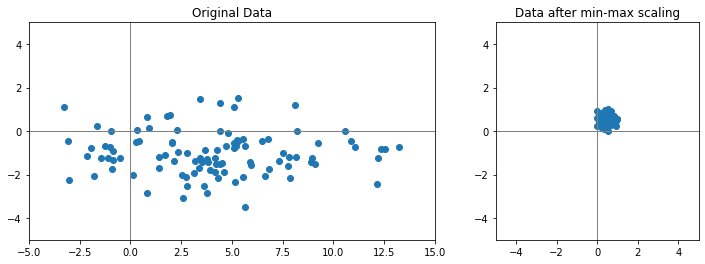

In [38]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [39]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

수출건수      수출금액      수입건수      수입금액      무역수지
0 -0.007488  1.398931 -0.163593  1.283660  1.256342
1 -0.689278 -0.252848  0.412529 -0.964444  0.401088
2 -0.847838 -1.091156 -0.993148 -0.863844 -1.097779
3 -0.417598  0.852853 -0.576399  0.705292  0.832209
4 -0.764918 -0.389673  0.146306 -1.276341  0.438027

In [40]:
trade_Standardization.describe()

수출건수          수출금액          수입건수          수입금액          무역수지
count  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02
mean  -1.093143e-16  6.376666e-17  1.821904e-17 -5.465713e-17  2.277381e-17
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -9.194976e-01 -1.231761e+00 -9.984408e-01 -1.276341e+00 -1.603764e+00
25%   -5.937426e-01 -1.041338e+00 -7.673625e-01 -7.911669e-01 -1.116765e+00
50%   -4.373265e-01 -1.564700e-01 -3.429346e-01 -4.137392e-01  1.426824e-01
75%    4.420459e-01  1.037200e+00  3.927781e-01  8.827841e-01  7.461637e-01
max    5.486317e+00  2.078416e+00  3.239068e+00  2.376092e+00  2.434109e+00

In [41]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

기간 국가명      수출건수      수출금액      수입건수      수입금액      무역수지
0  2015년 01월  중국  0.142372  0.794728  0.197014  0.700903  0.708320
1  2015년 01월  미국  0.035939  0.295728  0.332972  0.085394  0.496512
2  2015년 01월  일본  0.011187  0.042477  0.001249  0.112938  0.125310
3  2015년 02월  중국  0.078351  0.629759  0.099597  0.542551  0.603281
4  2015년 02월  미국  0.024131  0.254394  0.270146  0.000000  0.505660

In [42]:
trade.describe()

수출건수        수출금액        수입건수        수입금액        무역수지
count  195.000000  195.000000  195.000000  195.000000  195.000000
mean     0.143541    0.372113    0.235620    0.349450    0.397180
std      0.156108    0.302099    0.235988    0.273790    0.247655
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.050853    0.057527    0.054532    0.132836    0.120608
50%      0.075271    0.324844    0.154691    0.236172    0.432516
75%      0.212548    0.685450    0.328311    0.591147    0.581972
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [43]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [44]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min)/(train_max - train_min)
test_min_max =  (test - train_min)/(train_max - train_min)    # test를 min-max scaling할 때도 train 정규화 기준으로 수행
print("💫 It's okay, no biggie...")

💫 It's okay, no biggie...


In [45]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [46]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [47]:
scaler.transform(test)

array([[-0.25,  0.55]])

트레인, 테스트 데이터가 각각 나눠져있다면 그것도 각각 해줘야한다는 말

# 원-핫 인코딩

In [48]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


미국  일본  중국
0   0   0   1
1   1   0   0
2   0   1   0
3   0   0   1
4   1   0   0

In [49]:
trade = pd.concat([trade, country], axis=1)
trade.head()

기간 국가명      수출건수      수출금액      수입건수      수입금액      무역수지  미국  일본  중국
0  2015년 01월  중국  0.142372  0.794728  0.197014  0.700903  0.708320   0   0   1
1  2015년 01월  미국  0.035939  0.295728  0.332972  0.085394  0.496512   1   0   0
2  2015년 01월  일본  0.011187  0.042477  0.001249  0.112938  0.125310   0   1   0
3  2015년 02월  중국  0.078351  0.629759  0.099597  0.542551  0.603281   0   0   1
4  2015년 02월  미국  0.024131  0.254394  0.270146  0.000000  0.505660   1   0   0

In [50]:
trade = pd.concat([trade, country], axis=1)
trade.head()

기간 국가명      수출건수      수출금액      수입건수      수입금액      무역수지  미국  일본  \
0  2015년 01월  중국  0.142372  0.794728  0.197014  0.700903  0.708320   0   0   
1  2015년 01월  미국  0.035939  0.295728  0.332972  0.085394  0.496512   1   0   
2  2015년 01월  일본  0.011187  0.042477  0.001249  0.112938  0.125310   0   1   
3  2015년 02월  중국  0.078351  0.629759  0.099597  0.542551  0.603281   0   0   
4  2015년 02월  미국  0.024131  0.254394  0.270146  0.000000  0.505660   1   0   

   중국  미국  일본  중국  
0   1   0   0   1  
1   0   1   0   0  
2   0   0   1   0  
3   1   0   0   1  
4   0   1   0   0

In [51]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

기간      수출건수      수출금액      수입건수      수입금액      무역수지  미국  일본  중국  \
0  2015년 01월  0.142372  0.794728  0.197014  0.700903  0.708320   0   0   1   
1  2015년 01월  0.035939  0.295728  0.332972  0.085394  0.496512   1   0   0   
2  2015년 01월  0.011187  0.042477  0.001249  0.112938  0.125310   0   1   0   
3  2015년 02월  0.078351  0.629759  0.099597  0.542551  0.603281   0   0   1   
4  2015년 02월  0.024131  0.254394  0.270146  0.000000  0.505660   1   0   0   

   미국  일본  중국  
0   0   0   1  
1   1   0   0  
2   0   1   0  
3   0   0   1  
4   1   0   0

# 구간화

In [53]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("👽 Almost there..")

👽 Almost there..


<AxesSubplot:>

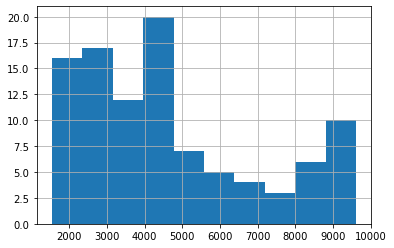

In [54]:
salary.hist()

In [55]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
print("👽 Almost there..")

👽 Almost there..


In [56]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
5      (4000, 6000]
6      (2000, 4000]
7      (2000, 4000]
8      (4000, 6000]
9      (4000, 6000]
10     (2000, 4000]
11     (2000, 4000]
12     (4000, 6000]
13     (4000, 6000]
14     (2000, 4000]
15     (4000, 6000]
16     (4000, 6000]
17     (4000, 6000]
18     (4000, 6000]
19     (4000, 6000]
20     (4000, 6000]
21     (2000, 4000]
22        (0, 2000]
23     (4000, 6000]
24     (2000, 4000]
25     (4000, 6000]
26     (2000, 4000]
27     (2000, 4000]
28     (2000, 4000]
29     (4000, 6000]
30        (0, 2000]
31     (2000, 4000]
32        (0, 2000]
33     (4000, 6000]
34     (4000, 6000]
35     (2000, 4000]
36     (2000, 4000]
37        (0, 2000]
38     (2000, 4000]
39     (4000, 6000]
40     (2000, 4000]
41        (0, 2000]
42     (2000, 4000]
43     (4000, 6000]
44        (0, 2000]
45     (6000, 8000]
46    (8000, 10000]
47    (8000, 10000]
48    (8000, 10000]
49     (2000, 4000]
